Read file 'transcript_table.txt'
- transcript_name: composed of the gene name plus a numeric identifier
- transcript_biotype: for example protein_coding, retained_intron, nonsense_mediated_decay
- transcript_length: the length of the transcript (without considering introns an poly A tail)
- utr5_length: the length of the 5’ UTR region (without considering introns)
- cds_length: the length of the CDS region (without considering introns)
- utr3_length: the length of the 3’ UTR region (without considering introns)
- exon_count: the number of exons of the transcript
- canonical_flag: a boolean indicating if the isoform is canonical (T: true, F: false)

In [3]:
import pandas as pd

Reading from 'transcript_table.txt'

In [4]:
df=pd.read_csv('transcript_table.txt',sep=',')


In [5]:
# call a head() just to remember how df looks like... 
df.head()

,transcript_name,transcript_biotype,transcript_length,utr5_length,cds_length,utr3_length,exon_count,canonical_flag
0,ARF5-001,protein_coding,1103,154,543,406,6,T
1,M6PR-001,protein_coding,2756,469,834,1453,7,T
2,ESRRA-002,protein_coding,2215,171,1272,772,7,F
3,FKBP4-001,protein_coding,3732,187,1380,2165,10,T
4,CYP26B1-001,protein_coding,4732,204,1539,2989,6,T


- Initially let's calculate the number of transcripts for human genome and some statistics

In [6]:
# number of transcripts
print("Number of transcripts in human genome: ", df.shape[0])

Number of transcripts in human genome:  189914


In [7]:
# statistics
print("Statistics for transcript length")
print("\tMinimum transcript length observed: ", df.transcript_length.min())

Statistics for transcript length
	Minimum transcript length observed:  8


In [8]:
print("\tMaximum transcript length observed: ", df.transcript_length.max())

	Maximum transcript length observed:  109224


In [9]:
print("\tMean transcript length observed: ", df.transcript_length.mean())

	Mean transcript length observed:  1506.8365786619206


In [10]:
print("\tMedian transcript length observed: ", df.transcript_length.median())

	Median transcript length observed:  797.0


We can retrieve rows of a DataFrame that satisfy a condition, as if we were using the row in an 'if' statement. This is shown in the example below:

e.g. Get the rows that have a transcript_length greater than 2433

`df[  df.transcript_length>2433      ]`

**NOTE: the condition in the square brackets is written as it would in an 'if' statement**


In [13]:
print("Rows that have a transcript_length of 2433", df[df.transcript_length>2433])

Rows that have a transcript_length of 2433        transcript_name       transcript_biotype  transcript_length  \
1             M6PR-001           protein_coding               2756   
3            FKBP4-001           protein_coding               3732   
4          CYP26B1-001           protein_coding               4732   
8           HS3ST1-001           protein_coding               8031   
9           SEMA3F-001           protein_coding               3802   
...                ...                      ...                ...   
189902        TCF4-076           protein_coding               7938   
189903       UBE3A-029           protein_coding               9131   
189904    ARHGAP21-020  nonsense_mediated_decay               4034   
189905     GRAMD1B-016           protein_coding               3849   
189907      GABRA1-015           protein_coding               4088   

        utr5_length  cds_length  utr3_length  exon_count canonical_flag  
1               469         834         14

- Calculating statistics of CDS length, excluding rows where CDS length is 0

In [14]:
print("Statistics for transcript length")
print("\tMinimum CDS length: ", df.cds_length[df.cds_length!=0].min())

Statistics for transcript length
	Minimum CDS length:  3


In [15]:
print("\tMaximum CDS length: ", df.cds_length[df.cds_length!=0].max())


	Maximum CDS length:  107976


In [16]:
print("\tMean CDS length: ", df.cds_length[df.cds_length!=0].mean())

	Mean CDS length:  1120.8539358350656


In [18]:
print("\tMedian CDS length: ", df.cds_length[df.cds_length!=0].median())

	Median CDS length:  678.0


- Calculating the percentage of human transcripts with a CDS length that is a multiple of 3 in the total set of transcripts with non-zero length.
- Recall that df.shape[0] gives the number of rows, and df.shape[1]) the number of columns in dataframe df

In [19]:
# Number of transcripts where CDS length is not equal to 0
# Note: .shape[0] returns num of rows!!!
cds_number = df.cds_length[df.cds_length>0].shape[0]

In [20]:
# Number of transcripts where CDS length is not equal to 0 and a multiple of 3
cds_multiple_number = df.cds_length[df.cds_length>0][df.cds_length%3==0].shape[0]

In [21]:
print((cds_multiple_number/cds_number)*100, "%")

79.69717751441246 %


- For each transcript_biotype, find the average transcript length

In [22]:
#result = df.groupby('transcript_biotype').aggregate(pd.DataFrame.mean)['transcript_length']
result = df.groupby('transcript_biotype')['transcript_length'].mean()
print(result)

transcript_biotype
3prime_overlapping_ncRNA              1841.700000
IG_C_gene                             1122.176471
IG_C_pseudogene                        555.111111
IG_D_gene                               22.030303
IG_J_gene                               66.555556
IG_J_pseudogene                         55.000000
IG_V_gene                              413.523077
IG_V_pseudogene                        298.173410
Mt_rRNA                               1256.500000
Mt_tRNA                                 68.545455
TEC                                   2242.108434
TR_C_gene                             1196.200000
TR_D_gene                               10.000000
TR_J_gene                               58.915493
TR_J_pseudogene                         59.250000
TR_V_gene                              426.064516
TR_V_pseudogene                        326.500000
antisense                              915.031154
bidirectional_promoter_lncRNA         1233.000000
lincRNA                        

<AxesSubplot:ylabel='Frequency'>

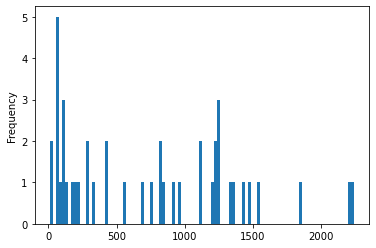

In [23]:
result.plot(kind='hist', bins=100)

* But... check the type of result variable! It is a Series.

In [27]:
type(result)

pandas.core.series.Series

In [28]:
result.index

Index(['3prime_overlapping_ncRNA', 'IG_C_gene', 'IG_C_pseudogene', 'IG_D_gene',
       'IG_J_gene', 'IG_J_pseudogene', 'IG_V_gene', 'IG_V_pseudogene',
       'Mt_rRNA', 'Mt_tRNA', 'TEC', 'TR_C_gene', 'TR_D_gene', 'TR_J_gene',
       'TR_J_pseudogene', 'TR_V_gene', 'TR_V_pseudogene', 'antisense',
       'bidirectional_promoter_lncRNA', 'lincRNA', 'miRNA', 'misc_RNA',
       'non_stop_decay', 'nonsense_mediated_decay', 'polymorphic_pseudogene',
       'processed_pseudogene', 'processed_transcript', 'protein_coding',
       'pseudogene', 'rRNA', 'retained_intron', 'ribozyme', 'scRNA', 'scaRNA',
       'sense_intronic', 'sense_overlapping', 'snRNA', 'snoRNA',
       'transcribed_processed_pseudogene', 'transcribed_unitary_pseudogene',
       'transcribed_unprocessed_pseudogene', 'unitary_pseudogene',
       'unprocessed_pseudogene', 'vaultRNA'],
      dtype='object', name='transcript_biotype')

* Better to convert the panda series to a dataframe with two columns: Transcr. Biotype, AVG Transcr. length

In [29]:
result = result.reset_index()
# or, another way is result = df.groupby('transcript_biotype')[['transcript_length']].mean() which directly returns a dataframe


result.columns = ['Transcr. Biotype', 'AVG Transcr. length']
print(result)

                      Transcr. Biotype  AVG Transcr. length
0             3prime_overlapping_ncRNA          1841.700000
1                            IG_C_gene          1122.176471
2                      IG_C_pseudogene           555.111111
3                            IG_D_gene            22.030303
4                            IG_J_gene            66.555556
5                      IG_J_pseudogene            55.000000
6                            IG_V_gene           413.523077
7                      IG_V_pseudogene           298.173410
8                              Mt_rRNA          1256.500000
9                              Mt_tRNA            68.545455
10                                 TEC          2242.108434
11                           TR_C_gene          1196.200000
12                           TR_D_gene            10.000000
13                           TR_J_gene            58.915493
14                     TR_J_pseudogene            59.250000
15                           TR_V_gene  

- For each transcript_biotype, find the average transcript length, in increasing order

In [30]:
result = result.sort_values('AVG Transcr. length')
print(result)

                      Transcr. Biotype  AVG Transcr. length
12                           TR_D_gene            10.000000
3                            IG_D_gene            22.030303
5                      IG_J_pseudogene            55.000000
13                           TR_J_gene            58.915493
14                     TR_J_pseudogene            59.250000
4                            IG_J_gene            66.555556
9                              Mt_tRNA            68.545455
20                               miRNA            83.451989
36                               snRNA           109.843940
37                              snoRNA           111.768675
29                                rRNA           113.195312
43                            vaultRNA           127.000000
33                              scaRNA           177.687500
32                               scRNA           200.000000
31                            ribozyme           230.400000
21                            misc_RNA  

- For protein_coding transcripts, find the average length of the 5’UTR, CDS and 3’ UTR

In [12]:
filtered = df[df.transcript_biotype=='protein_coding']
print(filtered)

print("For transcript_biotype = 'protein_coding':")
print("\tAverage length of UTR5: ", filtered.utr5_length.mean())
print("\tAverage length of UTR3: ", filtered.utr3_length.mean())
print("\tAverage length of CDS: ", filtered.cds_length.mean())

       transcript_name transcript_biotype  transcript_length  utr5_length  \
0             ARF5-001     protein_coding               1103          154   
1             M6PR-001     protein_coding               2756          469   
2            ESRRA-002     protein_coding               2215          171   
3            FKBP4-001     protein_coding               3732          187   
4          CYP26B1-001     protein_coding               4732          204   
...                ...                ...                ...          ...   
189902        TCF4-076     protein_coding               7938           88   
189903       UBE3A-029     protein_coding               9131         1163   
189905     GRAMD1B-016     protein_coding               3849          547   
189907      GABRA1-015     protein_coding               4088          153   
189908        CHML-003     protein_coding                705            0   

        cds_length  utr3_length  exon_count canonical_flag  
0             